In [3]:
#!/usr/bin/python
#coding = utf-8
#Author: Selvaria

# 利用softmax激活函数实现分类

import tensorflow as tf
from tensorflow import keras
import numpy as np
import time
import sys
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）

D:\Selvaria\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [3]:
len(x_train),len(x_test)

(60000, 10000)

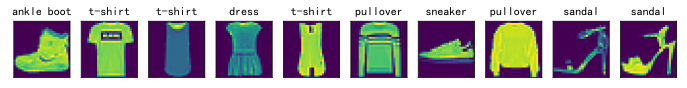

In [6]:
def get_fashion_mnist_labels(labels): #将数字标签替换成文字
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_fashion_mnist(images, labels): # 画图函数
    _, figs = plt.subplots(1, len(images), figsize=(12, 12)) #_是必须的，划分子图需要定义一个变量，用于创建figure
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.reshape((28, 28)))
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()
    
# 画图
X, y = [], []
for i in range(10):
    X.append(x_train[i])
    y.append(y_train[i])
show_fashion_mnist(X, get_fashion_mnist_labels(y))

In [7]:
# 读取数据

import time

batch_size = 256
if sys.platform.startswith('win'):
    num_workers = 0  # 0表示不用额外的进程来加速读取数据
else:
    num_workers = 4

train_iter = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(256)

start = time.time()
for X, y in train_iter:
    continue
print('%.2f sec' % (time.time() - start))

0.11 sec


In [1]:
#以下是从零开始的实现

import tensorflow as tf
import numpy as np

from tensorflow.keras.datasets import fashion_mnist

print(tf.__version__)

batch_size=256
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = tf.cast(x_train, tf.float32) / 255 #在进行矩阵相乘时需要float型，故强制类型转换为float型
x_test = tf.cast(x_test,tf.float32) / 255 #在进行矩阵相乘时需要float型，故强制类型转换为float型
train_iter = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
test_iter = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

2.1.0


In [2]:
# 初始化参数

num_inputs = 784 #输入的向量长度
num_outputs = 10

# softmax回归的权重和偏差参数分别为784×10和1×10的矩阵
W = tf.Variable(tf.random.normal(shape=(num_inputs, num_outputs), mean=0, stddev=0.01, dtype=tf.float32))
b = tf.Variable(tf.zeros(num_outputs, dtype=tf.float32))

In [4]:
X = tf.constant([[1, 2, 3], [4, 5, 6]])

print(tf.reduce_sum(X, axis=0, keepdims=True)) #keepdims=True是保留维度
print(tf.reduce_sum(X, axis=1, keepdims=True))
print(tf.reduce_sum(X, axis=0))
print(tf.reduce_sum(X, axis=1))

tf.Tensor([[5 7 9]], shape=(1, 3), dtype=int32)
tf.Tensor(
[[ 6]
 [15]], shape=(2, 1), dtype=int32)
tf.Tensor([5 7 9], shape=(3,), dtype=int32)
tf.Tensor([ 6 15], shape=(2,), dtype=int32)


In [5]:
# 3.6.3 实现softmax运算

def softmax(inputs, axis=-1): # 传入矩阵的行数是样本数，列数是输出个数
    # 对exp矩阵同行元素求和，最后令矩阵每行各元素与该行元素之和相除。
    return tf.exp(inputs)/tf.reduce_sum(tf.exp(inputs), axis, keepdims=True) #

X = tf.random.normal(shape=(2, 5))
X_prob = softmax(X)
X_prob, tf.reduce_sum(X_prob, axis=1)

(<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
 array([[0.11217493, 0.46901315, 0.05138699, 0.30024996, 0.06717493],
        [0.19441006, 0.03158838, 0.22592099, 0.41662493, 0.13145572]],
       dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.99999994, 1.        ], dtype=float32)>)

In [6]:
# 定义模型（softmax回归模型）

def net(X):
    # tf.reshape(tensor,shape,name=None)
    # -1所代表的含义是我们不用亲自去指定这一维的大小，函数会自动进行计算，这里要满足和W做矩阵乘法的话，根据乘法条件，要满足中间相等
    logits = tf.matmul(tf.reshape(X, shape=(-1, W.shape[0])), W) + b 
    return softmax(logits)

In [4]:
# 3.6.5 定义损失函数

import numpy as np

#示例：

y_hat = np.array([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]]) # y_hat是2个样本在3个类别的预测概率
y = np.array([0, 2], dtype='int32') #变量y是这2个样本的标签类别

#通过使用下面的函数，我们得到了2个样本的标签的预测概率。
# boolean_mask(a,b) 返回使a矩阵仅保留与b中“True”元素同下标的部分
# tf.boolean_mask(tensor, mask, name='boolean_mask', axis=None)
tf.boolean_mask(y_hat, tf.one_hot(y, depth=3))

<tf.Tensor: id=32, shape=(2,), dtype=float64, numpy=array([0.1, 0.5])>

In [15]:
arr = np.random.rand(5,4)
print(arr.shape)
print(arr.sum(axis=0)) #第0个轴的元素个数为5个，按轴求和即求这5个元素的和

(5, 4)
[3.47140102 2.4308668  3.65308059 2.4494247 ]


In [16]:
print(y_hat.shape)
print(tf.argmax(y_hat, axis=0))
print(y_hat.sum(axis=0))
print(y_hat.max(axis=0))
tf.argmax(y_hat, axis=1) 

(2, 3)
tf.Tensor([1 0 0], shape=(3,), dtype=int64)
[0.4 0.5 1.1]
[0.3 0.3 0.6]


<tf.Tensor: id=72, shape=(2,), dtype=int64, numpy=array([2, 2], dtype=int64)>

In [7]:
tf.one_hot(y, depth=3)

<tf.Tensor: id=42, shape=(2, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 0., 1.]], dtype=float32)>

In [8]:
# 下面实现了softmax回归中介绍的交叉熵损失函数。（注：由于在 Tensorflow 涉及运算类型转换的问题，使用cast函数对张量进行类型转换。）

def cross_entropy(y_hat, y):
    y = tf.cast(tf.reshape(y, shape=[-1, 1]),dtype=tf.int32)
    y = tf.one_hot(y, depth=y_hat.shape[-1]) 
    y = tf.cast(tf.reshape(y, shape=[-1, y_hat.shape[-1]]),dtype=tf.int32) 
    return -tf.math.log(tf.boolean_mask(y_hat, y)+1e-8)

In [9]:
#3.6.6 计算分类准确率
'''给定一个类别的预测概率分布y_hat，我们把预测概率最大的类别作为输出类别。如果它与真实类别y一致，说明这次预测是正确的。
分类准确率即正确预测数量与总预测数量之比。'''

def accuracy(y_hat, y):
    # 相等条件判断式(tf.argmax(y_hat, axis=1) == y)是一个数据类型为bool的Tensor，实际取值为：0（相等为假）或 1（相等为真）。
    return np.mean((tf.argmax(y_hat, axis=1) == y))

# 以上边示例的y_hat和y的数据作为演示
accuracy(y_hat, y)

0.5

In [10]:
# 计算批量准确率
# 对于tensorflow2中，比较的双方必须类型都是int型，所以要将输出和标签都转为int型

def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for _, (X, y) in enumerate(data_iter):
        y = tf.cast(y,dtype=tf.int64)
        acc_sum += np.sum(tf.cast(tf.argmax(net(X), axis=1), dtype=tf.int64) == y)
        n += y.shape[0]
    return acc_sum / n

# 因为我们并未训练模型net，权重是随机的，所以这个随机模型在验证集的准确率应该接近于类别个数 10 的倒数即 0.1。
print(evaluate_accuracy(test_iter, net))

0.1401


In [15]:
T = tf.Variable(tf.random.normal(shape=(4, 2), mean=4, stddev=0.1, dtype=tf.float32))
print(T)
N = T.numpy()
print(type(N))
print(N)

<tf.Variable 'Variable:0' shape=(4, 2) dtype=float32, numpy=
array([[3.974346 , 4.1031346],
       [3.930032 , 3.8223069],
       [4.0535703, 3.9881487],
       [4.190041 , 3.9234872]], dtype=float32)>
<class 'numpy.ndarray'>
[[3.974346  4.1031346]
 [3.930032  3.8223069]
 [4.0535703 3.9881487]
 [4.190041  3.9234872]]


In [11]:
# 3.6.7 训练模型

# 这里使用 1e-3 学习率，是因为原文 0.1 的学习率过大，会使 cross_entropy loss 计算返回 numpy.nan
num_epochs = 5
lr = 1e-3

# 
def train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, #256
              params=None, lr=None, trainer=None):
    global sample_grads
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
        for X, y in train_iter:
            with tf.GradientTape() as tape:
                y_hat = net(X)
                l = tf.reduce_sum(loss(y_hat, y))

            grads = tape.gradient(l, params)
            if trainer is None: #用自己算的梯度

                sample_grads = grads
                params[0].assign_sub(grads[0] * lr)
                params[1].assign_sub(grads[1] * lr)
            else:
                trainer.apply_gradients(zip(grads, params))  # “softmax回归的简洁实现”一节将用到

            y = tf.cast(y, dtype=tf.float32)
            train_l_sum += l.numpy()
            train_acc_sum += tf.reduce_sum(tf.cast(tf.argmax(y_hat, axis=1) == tf.cast(y, dtype=tf.int64), dtype=tf.int64)).numpy()
            n += y.shape[0]
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc))

# 优化器还是使用梯度下降
trainer = tf.keras.optimizers.SGD(lr) #本次没使用
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, batch_size, [W, b], lr)

W0207 15:59:20.816351 10804 deprecation.py:323] From C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\ops\array_grad.py:563: _EagerTensorBase.cpu (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.identity instead.


epoch 1, loss 0.9078, train acc 0.737, test acc 0.814
epoch 2, loss 0.6040, train acc 0.804, test acc 0.827
epoch 3, loss 0.5521, train acc 0.819, test acc 0.831
epoch 4, loss 0.5300, train acc 0.826, test acc 0.835
epoch 5, loss 0.5142, train acc 0.830, test acc 0.835


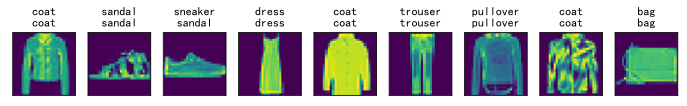

In [13]:
# 3.6.8 预测
# 训练完成后，现在就可以演示如何对图像进行分类了。给定一系列图像（第三行图像输出）
# 我们比较一下它们的真实标签（第一行文本输出）和模型预测结果（第二行文本输出）。

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）

X, y = iter(test_iter).next()

def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_fashion_mnist(images, labels):
    # 这⾥的_表示我们忽略（不使⽤）的变量
    _, figs = plt.subplots(1, len(images), figsize=(12, 12)) # 这里注意subplot 和subplots 的区别
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(tf.reshape(img, shape=(28, 28)).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()

true_labels = get_fashion_mnist_labels(y.numpy())
pred_labels = get_fashion_mnist_labels(tf.argmax(net(X), axis=1).numpy())
titles = [true + '\n' + pred for true, pred in zip(true_labels, pred_labels)]

show_fashion_mnist(X[10:19], titles[10:19])

In [17]:
# 下边是softmax回归的简洁实现

from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

In [18]:
# 初始化模型

model = keras.Sequential()

model.add(keras.layers.Flatten(input_shape=(28, 28))) # 将28 * 28的像素值，压缩成一行 (784, ) 
model.add(keras.layers.Dense(10, activation='softmax'))

In [21]:
# 3.7.4 定义优化算法
optimizer = tf.keras.optimizers.SGD(0.001)

# 3.7.5 训练模型
model.compile(optimizer=optimizer,
#             为什么要使用 sparse_categorical_crossentropy作为损失函数： https://blog.csdn.net/Shingle_/article/details/81988628
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=5,batch_size=256)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 11us/sample - loss: 0.4794 - accuracy: 0.8383
Epoch 2/5
60000/60000 [==============================] - 1s 9us/sample - loss: 0.4745 - accuracy: 0.8414
Epoch 3/5
60000/60000 [==============================] - 0s 8us/sample - loss: 0.4740 - accuracy: 0.8417
Epoch 4/5
60000/60000 [==============================] - 0s 8us/sample - loss: 0.4738 - accuracy: 0.8418
Epoch 5/5
60000/60000 [==============================] - 1s 9us/sample - loss: 0.4736 - accuracy: 0.8416


In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Acc:',test_acc)

10000/10000 [==============================] - 0s 41us/sample - loss: 0.5047 - accuracy: 0.8304
Test Acc: 0.8304
